In [1]:
import numpy as np
import control
from matplotlib import pyplot as plt

# Stability

## Check Kc giving negative real pole parts

In [2]:
Kc = 10
roots = np.roots([10, 17, 8, 1 + Kc])

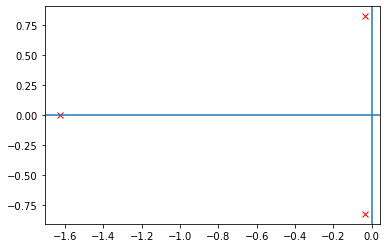

In [3]:
real = np.real(roots)
imag = np.imag(roots)

plt.figure()
plt.plot(real, imag, 'rx')
plt.axhline(0)
plt.axvline(0)

# Bode

In [24]:
s = control.tf([1, 0], [1])
ω_span = np.logspace(-2, 2, 2001)

In [31]:
Kc = 1
τ = 0.5
#Gol = Kc*(s + 1)*(2*s + 1)/((4*s + 1)*(2*s + 1)*s)
#Gol = Kc*(τ*s + 1)*(1/(τ*s))
#Gol = 1/(300*s)
Gp = 5/((s + 1)*(0.5*s + 1))
Gc = 0.4*((0.2*s + 1)/0.2*s)
G = Gp

(array([4.99968752e+00, 4.99968463e+00, 4.99968171e+00, ...,
        1.01833208e-03, 1.00899831e-03, 9.99750074e-04]),
 array([-0.01499963, -0.01506886, -0.01513841, ..., -3.11131815,
        -3.11145722, -3.11159565]),
 array([1.00000000e-02, 1.00461579e-02, 1.00925289e-02, ...,
        9.90831945e+01, 9.95405417e+01, 1.00000000e+02]))

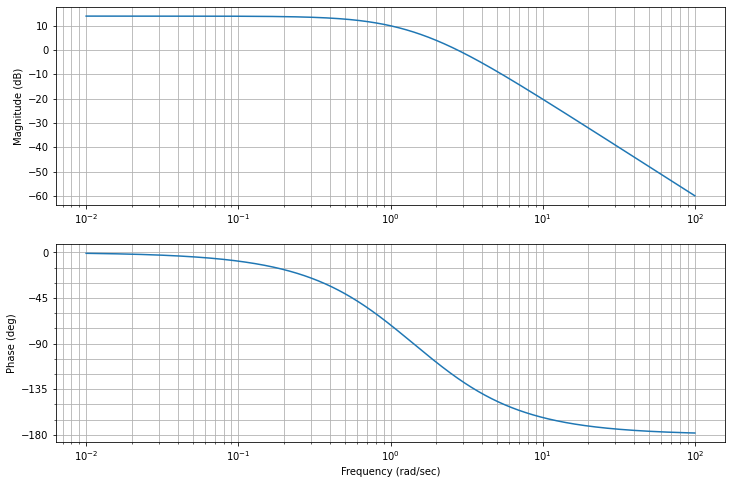

In [32]:
plt.figure(figsize=(12, 8))
control.bode(G, ω_span, dB=True)

# Discrete

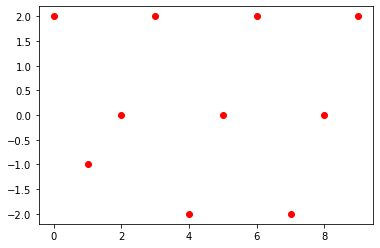

In [53]:
dt = 1
t_span = np.arange(0, 10, dt)
z = control.tf([1, 0], [1], dt)

#G = 1/(1 + z**-1)
G = (2 + z**(-1) + z**(-2) + z**(-3))/(1 + z**(-1) + z**(-2))
y = control.impulse_response(G, T=t_span)[1]
plt.plot(t_span, y, 'ro')

# Continuous

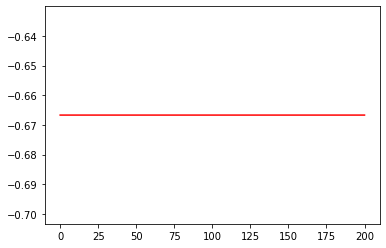

In [62]:
t_span = np.linspace(0, 200, 2001)
s = control.tf([1, 0], [1])

Gt = 1
#Gf = -0.6667*(7.1*s + 1)/(10*s + 1)
Gf = -0.6667
G = Gt*Gf
y = control.step_response(G, T=t_span)[1]
plt.plot(t_span, y, 'r') 